<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - Linear Regression
    </div>
<br><br>
<font size=4>
   **Name**: <br>
   **Student ID**: <br> <br>

<font face="Times New Roman" size=4><div dir=ltr>
# Problem 1: Linear Regression Model (40 + 30 optional points)
According to <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/blob/main/Jupyter_Notebooks/Chapter_02_Classical_Models/Linear%20regression.ipynb"><font face="Roboto">Linear Regression Notebook</font></a>, train a linear regression model on an arbitrary dataset. Explain your chosen dataset and split your data into train and test sets, then predict values for the test set using your trained model. Try to find the best hyperparameters for your model. (Using Lasso Regression, Ridge Regression or Elastic Net and comparing them will have extra optional points)
<br> Explain each step of your workflow.

In [64]:
# libraries
import csv
import pandas as pd
import numpy as np
import tqdm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

### loading dataset
This dataset is Tesla's stock from 2010 to 2020. it has some columns of opening price or highest and lowest price of the day. we try to predict closing/the last price of the stock based on the other features.


In [65]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [66]:
df.replace({'sex':{'male':0,'female':1}}, inplace=True)
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)
X = df.drop(columns='charges', axis=1)
y = np.log(df['charges'])

In [68]:
def feature_scaling_for_independent_variable(variables):
    for i in range(variables.shape[1]-3):
        variables[:,i] = (variables[:,i] - int(np.mean(variables[:,i])))/np.std(variables[:,i])
    return variables
   
def feature_scaling_for_dependent_variable(variables):
    variables = (variables - int(np.mean(variables)))/np.std(variables)
    return variables
X = np.array(X.values.tolist())
y = np.array(y.values.tolist())
X = feature_scaling_for_independent_variable(X)

y = feature_scaling_for_dependent_variable(y)

In [45]:
# categorical_columns = ['sex','children', 'smoker', 'region']
# df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
#                columns = categorical_columns,
#                drop_first =True,
#               dtype='int8')
# df_encode['charges'] = np.log(df_encode['charges'])
# X = df_encode.drop('charges',axis=1) # Independet variable
# y = df_encode['charges'] # dependent variable

In [71]:
X

array([[-1.4240238 ,  2.00010949, -0.34449341,  0.        ,  0.        ,
         1.        ],
       [-1.49522499,  0.        ,  0.61844769,  1.        ,  1.        ,
         0.        ],
       [-0.78321309,  0.        ,  0.49213344,  3.        ,  1.        ,
         0.        ],
       ...,
       [-1.49522499,  2.00010949,  1.12370469,  0.        ,  1.        ,
         0.        ],
       [-1.28162142,  2.00010949, -0.68898682,  0.        ,  1.        ,
         1.        ],
       [ 1.56642619,  2.00010949, -0.15256137,  0.        ,  0.        ,
         3.        ]])

### Split dataset to train and test

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regression mdoel closed form

In [73]:
class RegressionCloseForm:
    def __init__(self):
        self.W = None
              
    def train(self, X_train, y):
        X = np.append(np.ones((X_train.shape[0], 1)), X_train , axis=1)
        self.W = np.dot((np.linalg.inv(np.dot(X.T,X))), np.dot(X.T,y))
    
    def predict(self, X_test):
        X = np.append(np.ones((X_test.shape[0], 1)), X_test , axis=1)
        return np.dot(X, self.W)
    
    def mse_loss(self, pred, real):
        diff = pred - real
        return np.sum(diff * diff) / diff.size

In [74]:
model = RegressionCloseForm()
model.train(X_train, y_train)
predictions = model.predict(X_test)
model.mse_loss(y_test, predictions)

0.21052719586228552

### Vanilla Linear regression with sklearn

In [75]:
regr_model = linear_model.LinearRegression()
regr_model.fit(X_train, y_train)

LinearRegression()

MSE error on training data

In [76]:
predictions_train = regr_model.predict(X_train)
mean_squared_error(y_train, predictions_train)

0.24012012946484748

MSE error on test data

In [77]:
predictions = regr_model.predict(X_test)
mean_squared_error(y_test, predictions)

0.21052719586228555

In [78]:
# Evaluation of model regression score function. it shows our model works well
regr_model.score(X_test, y_test)

0.8021732851268444

Compare predicted values with real ones

In [79]:
comparison = pd.DataFrame({'Predicted':predictions,'Real':y_test, 'differnece':np.abs(predictions - y_test)})
comparison

,Predicted,Real,differnece
0,0.060513,0.125642,0.065129
1,-0.366321,-0.467591,0.101270
2,2.321766,1.399503,0.922263
3,0.164409,0.150104,0.014305
4,0.638099,1.552187,0.914088
...,...,...,...
263,2.203406,1.913746,0.289660
264,0.411776,0.447208,0.035432
265,-0.340195,-0.314801,0.025394
266,2.125127,2.244432,0.119305


In [80]:
class RegressionModel:
    
    def __init__(self, lr, number_of_epochs, regularization=None):
        self.m = None # samples
        self.n = None # features
        self.W = None # weight
        self.regularization = regularization # penalty object
        self.lr = lr # learning rate
        self.epoch = number_of_epochs # iteration
        
    def __calculate_cost(self, y, y_pred):
        cost = (1 / (2 * self.m)) * np.sum(np.square(y_pred-y))
        if self.regularization:
            return cost + self.regularization(self.W) 
        return cost
    
    def __initialize(self, X):
        X2 = np.insert(X, 0, 1, axis=1)
        self.m, self.n = X2.shape
        self.W = np.zeros((self.n, 1))
#         self.W = np.random.rand(self.n, 1)
        return X2
    
    def __update_weights(self, X, y, y_pred):
        dw = np.dot(X.T, (y_pred - y)) / self.m
        if self.regularization:
            dw += self.regularization.derivation(self.W)
        
        self.W -= self.lr * dw
        
    def fit(self, X_train, y_train):
        X = self.__initialize(X_train)
        y = y_train.reshape(self.m, -1)
        for e in tqdm.tqdm(range(1, self.epoch+1)):
            y_pred = np.dot(X, self.W)
            cost = self.__calculate_cost(y, y_pred)
            print(cost)
            self.__update_weights(X, y, y_pred)
            if e % 1000 == 0:
                print(f"The Cost in iteration {e}----->{cost} :)")

    def predict(self, X_test):
        X_test2 = np.insert(X_test, 0 , 1, axis= 1)
        return np.dot(X_test2, self.W) 

In [81]:
def mse_loss(pred, real):
    diff = pred - real
    return np.sum(diff * diff) / diff.size

In [62]:
y = y.to_numpy()
y = y[:, np.newaxis]
X = X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
reg_model_custom = RegressionModel(lr=5e-3, number_of_epochs=5000)
reg_model_custom.fit(X_train, y_train)
predictions = reg_model_custom.predict(X_test)
mse_loss(y_test, predictions)

 11%|████████                                                                     | 526/5000 [00:00<00:00, 5259.32it/s]

0.4989244152829621
0.49652290158215484
0.4941763490482589
0.4918820145310067
0.48963733112410895
0.4874398962512784
0.4852874605650061
0.4831779176025523
0.48110929414741527
0.47907974124807035
0.4770875258490754
0.4751310229926994
0.4732087085520981
0.47131915245971945
0.46946101239710675
0.4676330279145788
0.4658340149514207
0.46406286072922637
0.4623185189929035
0.4606000055755937
0.4589063942653849
0.4572368129532019
0.4555904400426748
0.45396650110409137
0.45236426575576766
0.4507830447573075
0.4492221873002818
0.4476810784828508
0.44615913695577064
0.4446558127280835
0.4431705851215944
0.4417029608639759
0.44025247231104225
0.43881867578937717
0.4374011500511034
0.4359994948331421
0.4346133295138354
0.4332422918602893
0.43188603686025007
0.43054423563274996
0.42921657441215094
0.4279027536005821
0.4266024868841101
0.4253155004082984
0.4240415320091079
0.4227803304953703
0.42153165497932005
0.4202952742519128
0.41907096619988093
0.4178585172616856
0.4166577219197175
0.415468382226

 32%|███████████████████████▉                                                    | 1575/5000 [00:00<00:00, 5112.56it/s]

0.19694860763890681
0.19687790839904726
0.1968072907204839
0.19673675445703642
0.19666629946294092
0.19659592559284836
0.1965256327018228
0.1964554206453398
0.19638528927928456
0.1963152384599505
0.19624526804403755
0.19617537788865028
0.1961055678512966
0.19603583778988593
0.19596618756272766
0.1958966170285295
0.19582712604639596
0.19575771447582674
0.19568838217671497
0.19561912900934603
0.1955499548343955
0.19548085951292812
0.19541184290639585
0.19534290487663653
0.19527404528587225
The Cost in iteration 1000----->0.19527404528587225 :)
0.19520526399670796
0.19513656087212983
0.19506793577550385
0.19499938857057422
0.19493091912146204
0.19486252729266368
0.19479421294904936
0.19472597595586175
0.19465781617871428
0.1945897334835901
0.19452172773684032
0.19445379880518263
0.19438594655570002
0.19431817085583927
0.19425047157340938
0.19418284857658055
0.1941153017338825
0.19404783091420308
0.19398043598678708
0.19391311682123477
0.1938458732875004
0.193778705255891
0.193711612597065

 53%|███████████████████████████████████████▉                                    | 2626/5000 [00:00<00:00, 5187.06it/s]

0.15402428834620743
0.15399580458563977
0.15396734548493998
0.1539389110202865
0.15391050116788857
0.15388211590398584
0.15385375520484876
0.15382541904677804
0.15379710740610508
0.15376882025919145
0.15374055758242913
0.15371231935224036
0.1536841055450776
0.15365591613742338
0.15362775110579038
0.1535996104267212
0.15357149407678855
0.15354340203259495
0.1535153342707728
0.1534872907679842
0.15345927150092112
0.15343127644630508
0.15340330558088727
0.15337535888144843
0.15334743632479877
0.15331953788777794
0.153291663547255
0.15326381328012834
0.15323598706332553
0.15320818487380344
0.15318040668854804
0.15315265248457446
0.1531249222389268
0.15309721592867814
0.15306953353093058
0.15304187502281494
0.15301424038149097
0.15298662958414713
0.15295904260800067
0.15293147943029728
0.15290394002831142
0.15287642437934612
0.1528489324607327
0.15282146424983106
0.15279401972402942
0.15276659886074434
0.1527392016374206
0.15271182803153122
0.15268447802057733
0.15265715158208829
0.15262984

 73%|███████████████████████████████████████████████████████▋                    | 3661/5000 [00:00<00:00, 5155.18it/s]

0.1350591537982589
0.13504670375854205
0.13503426408522098
0.1350218347695601
0.13500941580283146
0.1349970071763149
0.13498460888129782
0.13497222090907549
0.13495984325095056
0.1349474758982336
0.13493511884224269
0.1349227720743036
0.13491043558574972
0.13489810936792204
0.13488579341216922
0.13487348770984753
0.13486119225232082
0.1348489070309605
0.13483663203714566
0.13482436726226282
0.13481211269770627
0.13479986833487775
0.13478763416518658
0.13477541018004957
0.13476319637089113
0.13475099272914323
0.13473879924624535
0.1347266159136444
0.13471444272279498
0.13470227966515902
0.134690126732206
0.13467798391541302
0.1346658512062644
0.1346537285962522
0.13464161607687572
0.1346295136396419
0.13461742127606505
0.13460533897766688
0.13459326673597669
0.13458120454253103
0.13456915238887393
0.13455711026655692
0.13454507816713882
0.13453305608218588
0.1345210440032718
0.13450904192197763
0.13449704982989175
0.13448506771860996
0.1344730955797354
0.1344611334048786
0.1344491811856

 94%|███████████████████████████████████████████████████████████████████████▎    | 4692/5000 [00:00<00:00, 5116.79it/s]

0.12685025290633048
0.12684462214163372
0.12683899604770602
0.12683337462066815
0.1268277578566442
0.12682214575176154
0.1268165383021507
0.12681093550394537
0.12680533735328267
0.12679974384630274
0.12679415497914903
0.12678857074796823
0.1267829911489102
0.12677741617812804
0.126771845831778
0.12676628010601967
0.1267607189970157
0.12675516250093202
0.1267496106139377
0.1267440633322051
0.12673852065190966
0.12673298256923013
0.12672744908034833
0.1267219201814494
0.12671639586872147
0.12671087613835605
0.1267053609865477
0.12669985040949425
0.12669434440339655
0.12668884296445881
0.1266833460888883
0.12667785377289542
0.1266723660126938
0.12666688280450017
0.12666140414453453
0.12665593002901984
0.12665046045418243
0.12664499541625163
0.12663953491145993
0.126634078936043
0.12662862748623968
0.12662318055829186
0.1266177381484446
0.12661230025294615
0.12660686686804778
0.12660143799000398
0.1265960136150723
0.1265905937395135
0.12658517835959132
0.12657976747157274
0.126574361071727

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 5133.35it/s]

0.12313240180181868
0.12312985431221433
0.12312730893497743
0.12312476566835628
0.12312222451060051
0.12311968545996126
0.12311714851469109
0.12311461367304403
0.12311208093327561
0.12310955029364269
0.12310702175240365
0.12310449530781833
0.12310197095814798
0.12309944870165528
0.12309692853660438
0.1230944104612609
0.12309189447389182
0.1230893805727656
0.1230868687561522
0.12308435902232286
0.1230818513695504
0.12307934579610903
0.12307684230027435
0.12307434088032343
0.12307184153453475
0.12306934426118825
0.12306684905856526
0.12306435592494858
0.12306186485862236
0.12305937585787227
0.12305688892098536
0.12305440404625002
0.1230519212319562
0.12304944047639516
0.12304696177785968
0.1230444851346438
0.12304201054504321
0.12303953800735477
0.12303706751987686
0.1230345990809093
0.1230321326887533
0.12302966834171147
0.12302720603808781
0.1230247457761878
0.12302228755431818
0.12301983137078727
0.12301737722390466
0.12301492511198141
0.12301247503332995
0.12301002698626418
0.1230075

1.7836640779013162

In [19]:
y.shape

(1338,)

In [140]:
X_train

array([[ 16.4     ,  16.629999,  14.98    ],
       [302.      , 308.      , 301.      ],
       [316.5     , 320.75    , 309.670013],
       ...,
       [223.809998, 224.320007, 219.520004],
       [260.329987, 260.649994, 255.020004],
       [119.379997, 122.720001, 116.099998]])

In [141]:
X3

array([[ 0.27868404, -0.73569036,  1.59392632,  0.51435424],
       [-2.00686781, -0.41339664,  0.48137177, -1.30365096],
       [ 1.97570626,  0.75656131,  0.29205776, -0.06245429],
       ...,
       [-1.41189802, -0.28673778, -0.01150462,  0.48232366],
       [-0.65972536, -0.54038302,  2.28523492,  0.51340024],
       [-0.5193868 , -1.40033806,  1.35499477,  1.59867795]])

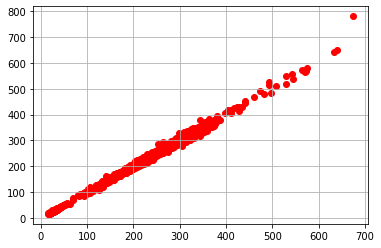

In [142]:
import matplotlib.pyplot as plt
plt.scatter(df['Open'], df["Close"], color='red')
plt.grid(True)
plt.show()

In [41]:
from sklearn.datasets import make_regression
X3, y3 = make_regression(n_samples=1932, n_features=4, noise=6)
y3 = y3[:, np.newaxis]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)
reg_model_custom = RegressionModel(lr=1e-2, number_of_epochs=10000)
reg_model_custom.fit(X_train3, y_train3)
predictions = reg_model_custom.predict(X_test3)
mse_loss(y_test3, predictions)

  5%|███▊                                                                        | 501/10000 [00:00<00:01, 5009.97it/s]

6977.697369305903
6830.498439446065
6686.428767526255
6545.421512408442
6407.411266937048
6272.334027052177
6140.127161570541
6010.7293826195655
5884.080716710534
5760.122476436887
5638.797232784159
5520.048788038239
5403.822149279057
5290.063502446925
5178.720186969172
5069.740670934921
4963.074526806104
4858.6724076531245
4756.48602390377
4656.46812059427
4558.572455111616
4462.753775416498
4368.967798736432
4277.171190718918
4187.321545034644
4099.377363420988
4013.298036156292
3929.043822955566
3846.575834278508
3765.8560130408955
3686.847116720631
3609.512699849881
3533.817096884955
3459.725405445759
3387.203469916798
3316.2178654019162
3246.73588202513
3178.7255095700284
3112.155422450454
3046.9949650052636
2983.2141371101743
2920.7835800998264
2859.6745629933503
2799.858969016876
2741.3092824165624
2683.9985755558487
2627.9004962907998
2572.9892556175164
2519.2396155857296
2466.6268774728287
2415.126870212681
2364.7159390737424
2315.370934581068
2267.069201676944
2219.7885691149

 15%|███████████▎                                                               | 1505/10000 [00:00<00:01, 4987.01it/s]

17.903058493003304
17.903055393464072
17.90305235365069
17.903049372408333
17.903046448604616
17.90304358112911
17.903040768892957
17.90303801082839
17.903035305888398
17.903032653046257
17.90303005129516
17.90302749964786
17.903024997136207
17.90302254281087
17.90302013574091
17.903017775013442
17.90301545973328
17.90301318902259
17.903010962020577
17.90300877788309
17.903006635782393
17.903004534906753
17.903002474460177
17.903000453662113
17.90299847174711
17.90299652796456
17.902994621578415
17.902992751866847
17.902990918122043
17.902989119649884
17.902987355769696
17.902985625814004
17.902983929128226
17.902982265070484
17.902980633011317
17.90297903233345
17.90297746243156
17.902975922712034
17.90297441259276
17.902972931502887
17.902971478882613
17.90297005418297
17.902968656865603
17.90296728640259
17.902965942276204
17.90296462397875
17.902963331012348
17.90296206288874
17.90296081912913
17.902959599263962
17.902958402832773
17.902957229384004
17.902956078474812
17.9029549496

 25%|██████████████████▊                                                        | 2513/10000 [00:00<00:01, 4999.30it/s]

17.902897142232042
17.902897142231982
17.90289714223193
17.90289714223187
17.90289714223182
17.902897142231765
17.902897142231716
17.902897142231655
17.902897142231605
17.90289714223156
17.90289714223151
17.902897142231467
17.902897142231417
17.902897142231367
17.902897142231325
17.90289714223128
17.902897142231236
17.902897142231193
17.90289714223115
17.902897142231115
17.902897142231073
17.90289714223103
17.902897142230994
17.902897142230955
17.902897142230916
17.90289714223088
17.902897142230845
17.90289714223081
17.902897142230774
17.90289714223074
17.902897142230707
17.902897142230675
17.902897142230646
17.902897142230607
17.902897142230582
17.902897142230554
17.902897142230522
17.90289714223049
17.90289714223046
17.902897142230433
17.902897142230405
17.902897142230383
17.902897142230355
17.902897142230326
17.902897142230305
17.90289714223028
17.90289714223025
17.902897142230227
17.902897142230202
17.902897142230184
17.90289714223016
17.902897142230138
17.90289714223011
17.9028971

 35%|██████████████████████████▍                                                | 3532/10000 [00:00<00:01, 5045.00it/s]

17.902897142228962
17.902897142228962
17.90289714222896
17.90289714222896
17.902897142228966
17.902897142228966
17.90289714222896
17.902897142228962
17.902897142228962
17.902897142228966
17.90289714222896
17.90289714222896
17.902897142228966
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.902897142228966
17.90289714222896
17.90289714222896
17.902897142228966
17.902897142228962
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.902897142228966
17.90289714222896
17.902897142228966
17.90289714222896
17.90289714222896
17.902897142228962
17.90289714222896
17.90289714222896
17.90289714222896
17.902897142228962
17.90289714222896
17.902897142228962
17.90289714222896
17.902897142228966
17.90289714222896
17.90289714222896
17.902897142228966
17.902897142228962
17.902897142228962
17.90289714222896
17.90289714222896
17.902897142228962
17.902897142228966
17.90289714222896
17.902897142228966
17.90

 45%|██████████████████████████████████                                         | 4545/10000 [00:00<00:01, 5046.14it/s]

17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228966
17.902897142228966
17.902897142228966
17.902897142228966
17.902897142228966
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.90289714222896
17.902897142228962
17.90289714

 56%|█████████████████████████████████████████▋                                 | 5557/10000 [00:01<00:00, 5021.89it/s]

17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142

 61%|█████████████████████████████████████████████▍                             | 6066/10000 [00:01<00:00, 5027.80it/s]

17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142

 71%|█████████████████████████████████████████████████████                      | 7069/10000 [00:01<00:00, 4954.34it/s]

17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142

 81%|████████████████████████████████████████████████████████████▍              | 8055/10000 [00:01<00:00, 4869.54it/s]

17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142

 90%|███████████████████████████████████████████████████████████████████▋       | 9033/10000 [00:01<00:00, 4856.03it/s]

17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4962.86it/s]

17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142228962
17.902897142

41.33892196467915

In [109]:
model = RegressionCloseForm()
model.train(X_train3, y_train3)
predictions = model.predict(X_test3)
model.mse_loss(y_test3, predictions)

40.023703500586684

In [110]:
regr_model = linear_model.LinearRegression()
regr_model.fit(X_train3, y_train3)
predictions_train = regr_model.predict(X_train3)
mean_squared_error(y_train3, predictions_train)

33.973409878287555

In [83]:
X3.shape

(5000, 3)

In [84]:
y3.shape

(5000,)

In [73]:
xx = X_train.copy()
y2 = y_train.to_numpy()
xx = np.insert(xx.to_numpy(), 0, 1, axis=1)
w = np.random.rand(xx.shape[1], 1)
y_pred = np.dot(xx, w)
cost = (1 / (2 * xx.shape[0])) * np.sum(np.square(y_pred - y2))

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [74]:
cost

NameError: name 'cost' is not defined

In [75]:
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, w):
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(w))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(w))
        return (l1_contribution + l2_contribution)

    def derivation(self, w):
        l1_derivation = self.l * self.l_ratio * np.sign(w)
        l2_derivation = self.l * (1 - self.l_ratio) * w
        return (l1_derivation + l2_derivation)

In [76]:
class LassoRegression(RegressionModel):
        def __init__(self, lr, number_of_epochs, l):
            regularization = ElasticPenalty(l, l_ratio=1) # penalty object
            super().__init__(lr, number_of_epochs, regularization)

            
class RidgeRegression(RegressionModel):
        def __init__(self, lr, number_of_epochs, l):
            regularization = ElasticPenalty(l, l_ratio=0) # penalty object
            super().__init__(lr, number_of_epochs, regularization)

            
class ElasticNet(RegressionModel):
        def __init__(self, lr, number_of_epochs, l = 0.1, l_ratio = 0.5):
            regularization = ElasticPenalty(l, l_ratio) # penalty object
            super().__init__(lr, number_of_epochs, regularization)

In [77]:
predictions

array([[1.21891405e+140],
       [1.42892644e+140],
       [5.20862322e+140],
       [4.51152945e+140],
       [8.52818756e+140],
       [8.94452793e+140],
       [9.96585136e+139],
       [3.10481484e+140],
       [1.98001161e+140],
       [2.19388738e+141],
       [1.51240505e+140],
       [8.25575043e+140],
       [1.67620419e+140],
       [8.47913204e+140],
       [2.03427796e+141],
       [1.34155286e+140],
       [1.08563250e+141],
       [3.47241548e+140],
       [6.15667918e+140],
       [6.27573882e+140],
       [3.65126815e+140],
       [9.02095349e+140],
       [5.12019694e+140],
       [1.11385521e+140],
       [1.34938491e+141],
       [9.32476089e+139],
       [2.36635019e+140],
       [5.65138619e+140],
       [1.12684545e+141],
       [3.59189622e+140],
       [8.59808642e+140],
       [1.26165341e+140],
       [3.85749084e+140],
       [6.01982899e+140],
       [3.05341179e+141],
       [3.25482369e+140],
       [1.56851363e+141],
       [3.74158926e+140],
       [1.48

In [80]:
from sklearn.datasets import make_regression
X3, y3 = make_regression(n_samples=5000, n_features=3, noise=3)
lasso_reg = LassoRegression(lr=1e-2, number_of_epochs=10000, l=0.1)
lasso_reg.fit(X3, y3)
predictions = lasso_reg.predict(X3)
mse_loss(y3, predictions)

  2%|█▌                                                                          | 209/10000 [00:00<00:04, 2090.00it/s]

2306.0238427469394
2260.9687332080916
2216.7994882902876
2173.498689199395
2131.0492596695053
2089.4344592269326
2048.637876586684
2008.6434231788016
1969.4353268020218
1930.9981254022434
1893.316660973355
1856.3760735780124
1820.1617954860058
1784.6595454279072
1749.8553229617296
1715.7354029503729
1682.2863301476782
1649.4949138909617
1617.348222897919
1585.8335801658639
1554.9385579712773
1524.650972967696
1494.958881380011
1465.850574293276
1437.3145730341655
1409.3396246432665
1381.9146974364094
1355.0289766532942
1328.6718601916905
1302.832954425528
1277.502070105234
1252.6692183386897
1228.3246066512306
1204.4586351231271
1181.0618926030302
1158.1251529958788
1135.6393716238151
1113.5956816586604
1091.985390624554
1070.7999769693686
1050.0310867035535
1029.6705301050783
1009.7102784891754
990.1424610416072
970.9593617142157
952.153416181515
933.7172088571423
915.6434699689785
897.9250726917902
880.5550303362601
863.5264935932961
846.8327478325347
830.4672104539704
814.4234282916

  7%|█████                                                                       | 659/10000 [00:00<00:04, 2213.70it/s]

15.565918129340172
15.542523045058271
15.519587645271429
15.497193741744042
15.475179797731958
15.453567952603137
15.432433113519345
15.411730621723917
15.391365781843561
15.371417781898934
15.351950309618474
15.332760353300632
15.31394743268465
15.295609462055701
15.277544719483245
15.259816958564066
15.242509313311103
15.225521837419368
15.208816474689431
15.192480140393652
15.17650706004548
15.160764964224647
15.145344366147686
15.130326419870276
15.1154918799193
15.100948776578836
15.086800999487775
15.072837642627228
15.05913278268604
15.045779405233223
15.032649752431354
15.019734655261324
15.00713029717118
14.994785573519223
14.98261456270324
14.970716489863058
14.959110719794452
14.947640760919377
14.936408730566388
14.925498577708623
14.914689125541196
14.904092007920308
14.893822216930914
14.88364385880038
14.873656798152709
14.863964101446204
14.854393619671896
14.844981332985792
14.835832902612424
14.826834597614098
14.817963842727217
14.809328765751758
14.800868986224021
1

 11%|████████▎                                                                  | 1113/10000 [00:00<00:03, 2245.98it/s]

14.377938205388423
14.377951850455883
14.377897068415805
14.377933769207658
14.377929350721741
14.37787500593265
14.377929951267962
14.377907969697434
14.377854040330712
14.37792670563077
14.377887647895086
14.377837580281312
14.3779211362183
14.377866930758724
14.377837731422154
14.377901022573372
14.377847208279952
14.377838273940714
14.377881870686494
14.377828428791007
14.377839173821808
14.377863630733717
14.377810543442557
14.377840399339618
14.37784625560466
14.377793506045677
14.377841920916218
14.377829700750514
14.377777272922838
14.3778437109886
14.377813924040655
14.377761802767331
14.377845743883576
14.377798885627454
14.377759951473635
14.37783571446692
14.377783149289904
14.377764873568474
14.377820389621982
14.377768122687357
14.377769906147227
14.377805752689184
14.377753770572678
14.377775031482951
14.377791769625368
14.377740059568463
14.377780233198129
14.377778408189226
14.377726958063853
14.377785496177403
14.377765637841982
14.377714436117195
14.377790806485635
1

 16%|███████████▋                                                               | 1565/10000 [00:00<00:03, 2218.73it/s]

14.377659617310378
14.377610371248617
14.377691079969152
14.377653322134748
14.377611600482588
14.377695784198231
14.377645818279234
14.377625398948474
14.377688366549425
14.377638548149804
14.377638798591693
14.377681179634866
14.377631504165038
14.377651810623869
14.377674215987255
14.377624679006198
14.377664445960487
14.377667468397119
14.377618065607226
14.377676715227532
14.377660929903016
14.377611657145188
14.37768862876806
14.377654593782221
14.37760921076165
14.377697041408238
14.377647049919675
14.377623080328647
14.377689584248252
14.377639741082557
14.377636549001403
14.377682359103325
14.377632659644862
14.377649628049236
14.377675358462348
14.377625798244939
14.37766232844388
14.37766857507367
14.37761914977541
14.377674660866164
14.377662001935228
14.377612707373535
14.377686635712593
14.377655632285173
14.377607267657961
14.377698068037095
14.3776480556681
14.377621194961424
14.37769057853319
14.377640715144778
14.377634719693189
14.377683322097184
14.377633603052306
1

 20%|███████████████                                                            | 2009/10000 [00:00<00:03, 2194.20it/s]

14.377623686167569
14.377666158389395
14.377666486562436
14.377617100669674
14.377678386441938
14.377659975601073
14.377610719273518
14.377690259657289
14.377653666191858
14.377610808064414
14.377696124112806
14.377646148425
14.37762463911233
14.377688692704705
14.377638864902952
14.37763807010123
14.377681492544058
14.377631808025559
14.377651112287136
14.377674516145053
14.37762497045605
14.377663776628427
14.377667756280381
14.377618345110996
14.377676073792511
14.377661205971432
14.377611925150708
14.377688014162466
14.377654858478913
14.377608617478815
14.377697302669688
14.377647303520376
14.377622511879999
14.377689834547606
14.377639984015355
14.377636004440891
14.377682598863405
14.377632892321714
14.37764910646452
14.377675588090067
14.37762602106229
14.377661828955226
14.377668794960652
14.377619363114803
14.377674182625334
14.377662212458404
14.377612911602203
14.377686177901808
14.377655833807331
14.377606826115244
14.377698266760856
14.377648248420183
14.37762077231558
14

 22%|████████████████▋                                                          | 2229/10000 [00:01<00:03, 2169.53it/s]

14.377640603846043
14.377680136006331
14.3776304784359
14.377653572777206
14.377673201660382
14.377623682083861
14.377666165926955
14.377666482494568
14.377617096628995
14.377678393907892
14.377659971576708
14.37761071527712
14.377690267049523
14.377653662212193
14.377610815392778
14.377696120149714
14.377646144490825
14.37762464636327
14.377688688787522
14.377638861015306
14.377638077273172
14.377681488673764
14.377631804185363
14.377651119378655
14.377674512322518
14.377624966664104
14.377663783638223
14.377667752506362
14.37761834136799
14.377676080719425
14.37766120224658
14.377611921457243
14.377688021005453
14.377654854803783
14.377608624250264
14.377697299012823
14.37764729989532
14.377622518565824
14.377689830940994
14.377639980440815
14.377636011040428
14.377682595307451
14.377632888798045
14.377649112977217
14.377675584585095
14.377626017589765
14.377661835380609
14.377668791506899
14.377619359693629
14.377674188963027
14.37766220905604
14.377612908232503
14.377686184151518
1

 27%|███████████████████▉                                                       | 2665/10000 [00:01<00:03, 1992.84it/s]

14.377634321503297
14.377683500472212
14.37763377595109
14.377647472357381
14.377676461631566
14.377626877184152
14.377660242298756
14.377669641342656
14.377620192618872
14.377672642076503
14.377663032557464
14.377613715347533
14.377684682153495
14.37765662846991
14.377607438699549
14.377696372712965
14.377650422506752
14.37761677178252
14.37769291769916
14.377643005769814
14.377630430506226
14.377685586027015
14.377635820000084
14.37764369401323
14.37767848237411
14.37762885771102
14.377656573431757
14.37767159936614
14.377622111675127
14.377669079595247
14.377664929883068
14.377615574914117
14.377681223049
14.37765846704951
14.37760924068948
14.377693014056787
14.37765220422553
14.377613495246731
14.377694678935807
14.377644731956313
14.37762724873188
14.37768729244279
14.377637492456913
14.37764060433492
14.377680135744455
14.377630478178279
14.377653573254516
14.377673201405152
14.377623681832787
14.377666166392949
14.377666482245822
14.377617096384302
14.377678394362817
14.3776599

 31%|███████████████████████▏                                                   | 3094/10000 [00:01<00:03, 2070.19it/s]

14.377687292435414
14.377637492449669
14.37764060434831
14.377680135737286
14.377630478171238
14.377653573267558
14.377673201398183
14.37762368182594
14.377666166405653
14.377666482239041
14.37761709637764
14.377678394375193
14.377659971327688
14.377610715032166
14.37769026750568
14.37765366196951
14.377610815839766
14.37769611990932
14.377646144254365
14.377624646799616
14.377688688553288
14.377638860784913
14.377638077699109
14.377681488445536
14.377631803960877
14.377651119794413
14.377674512100139
14.377624966445376
14.377663784044032
14.377667752289682
14.377618341154873
14.377676081115503
14.377661202035457
14.377611921249592
14.377688021392022
14.377654854598077
14.377608624629007
14.377697298809068
14.377647299694926
14.377622518935482
14.377689830742499
14.377639980245593
14.377636011401215
14.377682595114077
14.377632888607863
14.377649113329323
14.377675584396712
14.3776260174045
14.37766183572423
14.37766879132338
14.377619359513147
14.377674189298356
14.377662208877261
14.

 35%|██████████████████████████▌                                                | 3549/10000 [00:01<00:02, 2162.97it/s]

14.377681223064734
14.377658467041137
14.37760924068126
14.377693014072111
14.377652204217387
14.377613495261722
14.377694678927748
14.377644731948395
14.377627248746485
14.377687292434953
14.377637492449216
14.377640604349146
14.377680135736838
14.377630478170794
14.377653573268374
14.377673201397748
14.377623681825511
14.377666166406451
14.37766648223862
14.377617096377225
14.377678394375968
14.377659971327272
14.37761071503176
14.377690267506434
14.37765366196911
14.377610815840505
14.377696119908922
14.377646144253976
14.37762464680033
14.377688688552903
14.377638860784533
14.377638077699803
14.37768148844516
14.37763180396051
14.37765111979509
14.377674512099777
14.377624966445019
14.377663784044692
14.37766775228933
14.377618341154525
14.377676081116146
14.377661202035116
14.377611921249256
14.377688021392647
14.377654854597743
14.37760862462962
14.377697298808737
14.377647299694601
14.377622518936079
14.377689830742181
14.37763998024528
14.377636011401794
14.377682595113768
14.3

 40%|█████████████████████████████▉                                             | 3988/10000 [00:01<00:02, 2172.22it/s]

14.377680135736828
14.377630478170788
14.37765357326839
14.377673201397736
14.3776236818255
14.377666166406467
14.37766648223861
14.377617096377216
14.377678394375984
14.377659971327265
14.377610715031757
14.377690267506448
14.3776536619691
14.37761081584052
14.377696119908915
14.37764614425397
14.377624646800346
14.377688688552896
14.377638860784526
14.377638077699821
14.377681488445152
14.377631803960501
14.377651119795107
14.377674512099768
14.377624966445012
14.377663784044707
14.377667752289323
14.37761834115452
14.37767608111616
14.377661202035107
14.377611921249247
14.377688021392661
14.377654854597733
14.37760862462963
14.37769729880873
14.377647299694594
14.377622518936093
14.377689830742174
14.377639980245274
14.377636011401806
14.377682595113757
14.377632888607552
14.3776491133299
14.377675584396403
14.377626017404197
14.377661835724792
14.37766879132308
14.377619359512854
14.377674189298904
14.377662208876972
14.377612908056399
14.377686184479277
14.37765583028202
14.377606

 42%|███████████████████████████████▌                                           | 4206/10000 [00:01<00:02, 2155.34it/s]

14.377694678927735
14.377644731948385
14.377627248746501
14.377687292434942
14.377637492449207
14.377640604349168
14.377680135736828
14.377630478170785
The Cost in iteration 4000----->14.377630478170785 :)
14.37765357326839
14.377673201397737
14.377623681825504
14.377666166406467
14.37766648223861
14.377617096377216
14.377678394375986
14.377659971327265
14.377610715031754
14.377690267506452
14.3776536619691
14.37761081584052
14.377696119908915
14.37764614425397
14.377624646800346
14.377688688552894
14.377638860784526
14.377638077699821
14.377681488445154
14.377631803960501
14.377651119795107
14.37767451209977
14.377624966445012
14.377663784044707
14.377667752289323
14.37761834115452
14.377676081116162
14.377661202035108
14.377611921249247
14.377688021392661
14.377654854597735
14.37760862462963
14.37769729880873
14.377647299694598
14.377622518936093
14.377689830742172
14.377639980245274
14.377636011401805
14.377682595113761
14.377632888607554
14.3776491133299
14.377675584396403
14.37762

 46%|██████████████████████████████████▊                                        | 4640/10000 [00:02<00:02, 2143.02it/s]

14.377656573448355
14.37767159935727
14.377622111666415
14.377669079611417
14.377664929874443
14.377615574905647
14.377681223064755
14.377658467041126
14.377609240681249
14.377693014072133
14.377652204217377
14.377613495261743
14.377694678927735
14.377644731948385
14.377627248746501
14.377687292434942
14.377637492449207
14.377640604349168
14.377680135736828
14.377630478170785
14.37765357326839
14.377673201397737
14.377623681825504
14.377666166406467
14.37766648223861
14.377617096377216
14.377678394375986
14.377659971327265
14.377610715031754
14.377690267506452
14.3776536619691
14.37761081584052
14.377696119908915
14.37764614425397
14.377624646800346
14.377688688552894
14.377638860784526
14.377638077699821
14.377681488445154
14.377631803960501
14.377651119795107
14.37767451209977
14.377624966445012
14.377663784044707
14.377667752289323
14.37761834115452
14.377676081116162
14.377661202035108
14.377611921249247
14.377688021392661
14.377654854597735
14.37760862462963
14.37769729880873
14.3

 51%|██████████████████████████████████████                                     | 5068/10000 [00:02<00:02, 2122.93it/s]

14.377620192608457
14.377672642095842
14.377663032547158
14.377613715337407
14.377684682172337
14.377656628459887
14.377607438689703
14.377696372731315
14.377650422497005
14.377616771800472
14.377692917689515
14.377643005760337
14.377630430523716
14.377685586017634
14.377635819990868
14.377643694030267
14.377678482364988
14.37762885770206
14.377656573448355
14.37767159935727
14.377622111666415
14.377669079611417
14.377664929874443
14.377615574905647
14.377681223064755
14.377658467041126
14.377609240681249
14.377693014072133
14.377652204217377
14.377613495261743
14.377694678927735
14.377644731948385
14.377627248746501
14.377687292434942
14.377637492449207
14.377640604349168
14.377680135736828
14.377630478170785
14.37765357326839
14.377673201397737
14.377623681825504
14.377666166406467
14.37766648223861
14.377617096377216
14.377678394375986
14.377659971327265
14.377610715031754
14.377690267506452
14.3776536619691
14.37761081584052
14.377696119908915
14.37764614425397
14.377624646800346
1

 55%|█████████████████████████████████████████▎                                 | 5508/10000 [00:02<00:02, 2157.40it/s]

14.377634321524209
14.377683500461004
14.377633775940076
14.377647472377756
14.377676461620666
14.377626877173448
14.377660242318605
14.377669641332059
14.377620192608457
14.377672642095842
14.377663032547158
14.377613715337407
14.377684682172337
14.377656628459887
14.377607438689703
14.377696372731315
14.377650422497005
14.377616771800472
14.377692917689515
14.377643005760337
14.377630430523716
14.377685586017634
14.377635819990868
14.377643694030267
14.377678482364988
14.37762885770206
14.377656573448355
14.37767159935727
14.377622111666415
14.377669079611417
14.377664929874443
14.377615574905647
14.377681223064755
14.377658467041126
14.377609240681249
14.377693014072133
14.377652204217377
14.377613495261743
14.377694678927735
14.377644731948385
14.377627248746501
14.377687292434942
14.377637492449207
14.377640604349168
14.377680135736828
14.377630478170785
14.37765357326839
14.377673201397737
14.377623681825504
14.377666166406467
14.37766648223861
14.377617096377216
14.3776783943759

 60%|████████████████████████████████████████████▋                              | 5953/10000 [00:02<00:01, 2182.86it/s]

14.37764824495094
14.377620778716029
14.377690765152526
14.377640896062484
14.377634321524209
14.377683500461004
14.377633775940076
14.377647472377756
14.377676461620666
14.377626877173448
14.377660242318605
14.377669641332059
14.377620192608457
14.377672642095842
14.377663032547158
14.377613715337407
14.377684682172337
14.377656628459887
14.377607438689703
14.377696372731315
14.377650422497005
14.377616771800472
14.377692917689515
14.377643005760337
14.377630430523716
14.377685586017634
14.377635819990868
14.377643694030267
14.377678482364988
14.37762885770206
14.377656573448355
14.37767159935727
14.377622111666415
14.377669079611417
14.377664929874443
14.377615574905647
14.377681223064755
14.377658467041126
14.377609240681249
14.377693014072133
14.377652204217377
14.377613495261743
14.377694678927735
14.377644731948385
14.377627248746501
14.377687292434942
14.377637492449207
14.377640604349168
14.377680135736828
14.377630478170785
14.37765357326839
14.377673201397737
14.3776236818255

 64%|████████████████████████████████████████████████                           | 6406/10000 [00:02<00:01, 2218.37it/s]

14.377634321524209
14.377683500461004
14.377633775940076
14.377647472377756
14.377676461620666
14.377626877173448
14.377660242318605
14.377669641332059
14.377620192608457
14.377672642095842
14.377663032547158
14.377613715337407
14.377684682172337
14.377656628459887
14.377607438689703
14.377696372731315
14.377650422497005
14.377616771800472
14.377692917689515
14.377643005760337
14.377630430523716
14.377685586017634
14.377635819990868
14.377643694030267
14.377678482364988
14.37762885770206
14.377656573448355
14.37767159935727
14.377622111666415
14.377669079611417
14.377664929874443
14.377615574905647
14.377681223064755
14.377658467041126
14.377609240681249
14.377693014072133
14.377652204217377
14.377613495261743
14.377694678927735
14.377644731948385
14.377627248746501
14.377687292434942
14.377637492449207
14.377640604349168
14.377680135736828
14.377630478170785
14.37765357326839
14.377673201397737
14.377623681825504
14.377666166406467
14.37766648223861
14.377617096377216
14.3776783943759

 66%|█████████████████████████████████████████████████▋                         | 6628/10000 [00:03<00:01, 2218.85it/s]

14.377669641332059
14.377620192608457
14.377672642095842
14.377663032547158
14.377613715337407
14.377684682172337
14.377656628459887
14.377607438689703
14.377696372731315
14.377650422497005
14.377616771800472
14.377692917689515
14.377643005760337
14.377630430523716
14.377685586017634
14.377635819990868
14.377643694030267
14.377678482364988
14.37762885770206
14.377656573448355
14.37767159935727
14.377622111666415
14.377669079611417
14.377664929874443
14.377615574905647
14.377681223064755
14.377658467041126
14.377609240681249
14.377693014072133
14.377652204217377
14.377613495261743
14.377694678927735
14.377644731948385
14.377627248746501
14.377687292434942
14.377637492449207
14.377640604349168
14.377680135736828
14.377630478170785
14.37765357326839
14.377673201397737
14.377623681825504
14.377666166406467
14.37766648223861
14.377617096377216
14.377678394375986
14.377659971327265
14.377610715031754
14.377690267506452
14.3776536619691
14.37761081584052
14.377696119908915
14.37764614425397
1

 71%|█████████████████████████████████████████████████████                      | 7071/10000 [00:03<00:01, 2181.21it/s]


14.377613715337407
14.377684682172337
14.377656628459887
14.377607438689703
14.377696372731315
14.377650422497005
14.377616771800472
14.377692917689515
14.377643005760337
14.377630430523716
14.377685586017634
14.377635819990868
14.377643694030267
14.377678482364988
14.37762885770206
14.377656573448355
14.37767159935727
14.377622111666415
14.377669079611417
14.377664929874443
14.377615574905647
14.377681223064755
14.377658467041126
14.377609240681249
14.377693014072133
14.377652204217377
14.377613495261743
14.377694678927735
14.377644731948385
14.377627248746501
14.377687292434942
14.377637492449207
14.377640604349168
14.377680135736828
14.377630478170785
14.37765357326839
14.377673201397737
14.377623681825504
14.377666166406467
14.37766648223861
14.377617096377216
14.377678394375986
14.377659971327265
14.377610715031754
14.377690267506452
14.3776536619691
14.37761081584052
14.377696119908915
14.37764614425397
14.377624646800346
14.377688688552894
14.377638860784526
14.377638077699821


 75%|████████████████████████████████████████████████████████▎                  | 7514/10000 [00:03<00:01, 2192.21it/s]

14.377676461620666
14.377626877173448
14.377660242318605
14.377669641332059
14.377620192608457
14.377672642095842
14.377663032547158
14.377613715337407
14.377684682172337
14.377656628459887
14.377607438689703
14.377696372731315
14.377650422497005
14.377616771800472
14.377692917689515
14.377643005760337
14.377630430523716
14.377685586017634
14.377635819990868
14.377643694030267
14.377678482364988
14.37762885770206
14.377656573448355
14.37767159935727
14.377622111666415
14.377669079611417
14.377664929874443
14.377615574905647
14.377681223064755
14.377658467041126
14.377609240681249
14.377693014072133
14.377652204217377
14.377613495261743
14.377694678927735
14.377644731948385
14.377627248746501
14.377687292434942
14.377637492449207
14.377640604349168
14.377680135736828
14.377630478170785
14.37765357326839
14.377673201397737
14.377623681825504
14.377666166406467
14.37766648223861
14.377617096377216
14.377678394375986
14.377659971327265
14.377610715031754
14.377690267506452
14.3776536619691

 80%|███████████████████████████████████████████████████████████▋               | 7953/10000 [00:03<00:00, 2184.06it/s]

14.377683500461004
14.377633775940076
14.377647472377756
14.377676461620666
14.377626877173448
14.377660242318605
14.377669641332059
14.377620192608457
14.377672642095842
14.377663032547158
14.377613715337407
14.377684682172337
14.377656628459887
14.377607438689703
14.377696372731315
14.377650422497005
14.377616771800472
14.377692917689515
14.377643005760337
14.377630430523716
14.377685586017634
14.377635819990868
14.377643694030267
14.377678482364988
14.37762885770206
14.377656573448355
14.37767159935727
14.377622111666415
14.377669079611417
14.377664929874443
14.377615574905647
14.377681223064755
14.377658467041126
14.377609240681249
14.377693014072133
14.377652204217377
14.377613495261743
14.377694678927735
14.377644731948385
14.377627248746501
14.377687292434942
14.377637492449207
14.377640604349168
14.377680135736828
14.377630478170785
14.37765357326839
14.377673201397737
14.377623681825504
14.377666166406467
14.37766648223861
14.377617096377216
14.377678394375986
14.3776599713272

 84%|██████████████████████████████████████████████████████████████▉            | 8390/10000 [00:03<00:00, 2168.57it/s]

14.377698263256029
14.37764824495094
14.377620778716029
14.377690765152526
14.377640896062484
14.377634321524209
14.377683500461004
14.377633775940076
14.377647472377756
14.377676461620666
14.377626877173448
14.377660242318605
14.377669641332059
14.377620192608457
14.377672642095842
14.377663032547158
14.377613715337407
14.377684682172337
14.377656628459887
14.377607438689703
14.377696372731315
14.377650422497005
14.377616771800472
14.377692917689515
14.377643005760337
14.377630430523716
14.377685586017634
14.377635819990868
14.377643694030267
14.377678482364988
14.37762885770206
14.377656573448355
14.37767159935727
14.377622111666415
14.377669079611417
14.377664929874443
14.377615574905647
14.377681223064755
14.377658467041126
14.377609240681249
14.377693014072133
14.377652204217377
14.377613495261743
14.377694678927735
14.377644731948385
14.377627248746501
14.377687292434942
14.377637492449207
14.377640604349168
14.377680135736828
14.377630478170785
14.37765357326839
14.3776732013977

 88%|██████████████████████████████████████████████████████████████████▏        | 8826/10000 [00:04<00:00, 2170.72it/s]

14.377668791323082
14.377619359512853
14.3776741892989
14.37766220887697
14.377612908056399
14.377686184479277
14.37765583028202
14.377606832611725
14.377698263256029
14.37764824495094
14.377620778716029
14.377690765152526
14.377640896062484
14.377634321524209
14.377683500461004
14.377633775940076
14.377647472377756
14.377676461620666
14.377626877173448
14.377660242318605
14.377669641332059
14.377620192608457
14.377672642095842
14.377663032547158
14.377613715337407
14.377684682172337
14.377656628459887
14.377607438689703
14.377696372731315
14.377650422497005
14.377616771800472
14.377692917689515
14.377643005760337
14.377630430523716
14.377685586017634
14.377635819990868
14.377643694030267
14.377678482364988
14.37762885770206
14.377656573448355
14.37767159935727
14.377622111666415
14.377669079611417
14.377664929874443
14.377615574905647
14.377681223064755
14.377658467041126
14.377609240681249
14.377693014072133
14.377652204217377
14.377613495261743
14.377694678927735
14.377644731948385


 93%|█████████████████████████████████████████████████████████████████████▍     | 9261/10000 [00:04<00:00, 2150.60it/s]

14.377639980245274
14.377636011401805
14.377682595113761
14.377632888607554
14.3776491133299
14.377675584396403
14.377626017404197
14.37766183572479
14.377668791323082
14.377619359512853
14.3776741892989
14.37766220887697
14.377612908056399
14.377686184479277
14.37765583028202
14.377606832611725
14.377698263256029
14.37764824495094
14.377620778716029
14.377690765152526
14.377640896062484
14.377634321524209
14.377683500461004
14.377633775940076
14.377647472377756
14.377676461620666
14.377626877173448
14.377660242318605
14.377669641332059
14.377620192608457
14.377672642095842
14.377663032547158
14.377613715337407
14.377684682172337
14.377656628459887
14.377607438689703
14.377696372731315
14.377650422497005
14.377616771800472
14.377692917689515
14.377643005760337
14.377630430523716
14.377685586017634
14.377635819990868
14.377643694030267
14.377678482364988
14.37762885770206
14.377656573448355
14.37767159935727
14.377622111666415
14.377669079611417
14.377664929874443
14.377615574905647
14.

 95%|███████████████████████████████████████████████████████████████████████    | 9477/10000 [00:04<00:00, 2128.10it/s]

14.377663784044707
14.377667752289323
14.37761834115452
14.377676081116162
14.377661202035108
14.377611921249247
14.377688021392661
14.377654854597735
14.37760862462963
14.37769729880873
14.377647299694598
14.377622518936093
14.377689830742172
14.377639980245274
14.377636011401805
14.377682595113761
14.377632888607554
14.3776491133299
14.377675584396403
14.377626017404197
14.37766183572479
14.377668791323082
14.377619359512853
14.3776741892989
14.37766220887697
14.377612908056399
14.377686184479277
14.37765583028202
14.377606832611725
14.377698263256029
14.37764824495094
14.377620778716029
14.377690765152526
14.377640896062484
14.377634321524209
14.377683500461004
14.377633775940076
14.377647472377756
14.377676461620666
14.377626877173448
14.377660242318605
14.377669641332059
14.377620192608457
14.377672642095842
14.377663032547158
14.377613715337407
14.377684682172337
14.377656628459887
14.377607438689703
14.377696372731315
14.377650422497005
14.377616771800472
14.377692917689515
14.3

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2154.71it/s]

14.377690267506452
14.3776536619691
14.37761081584052
14.377696119908915
14.37764614425397
14.377624646800346
14.377688688552894
14.377638860784526
14.377638077699821
14.377681488445154
14.377631803960501
14.377651119795107
14.37767451209977
14.377624966445012
14.377663784044707
14.377667752289323
14.37761834115452
14.377676081116162
14.377661202035108
14.377611921249247
14.377688021392661
14.377654854597735
14.37760862462963
14.37769729880873
14.377647299694598
14.377622518936093
14.377689830742172
14.377639980245274
14.377636011401805
14.377682595113761
14.377632888607554
14.3776491133299
14.377675584396403
14.377626017404197
14.37766183572479
14.377668791323082
14.377619359512853
14.3776741892989
14.37766220887697
14.377612908056399
14.377686184479277
14.37765583028202
14.377606832611725
14.377698263256029
14.37764824495094
14.377620778716029
14.377690765152526
14.377640896062484
14.377634321524209
14.377683500461004
14.377633775940076
14.377647472377756
14.377676461620666
14.377626

9386.96075119869

In [48]:
lasso_reg = LassoRegression(lr=1e-2, number_of_epochs=100, l=0.1)
lasso_reg.fit(X_train, y_train)
predictions = lasso_reg.predict(X_test)
mse_loss(y_test, predictions)

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]C:\Users\Mahdi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':
C:\Users\Mahdi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':
C:\Users\Mahdi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
C:\Users\Mahdi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2089.91it/s]

495517469830.9618
ho
1.6198111043606708e+35
ho
5.29504644319265e+58
ho
1.7309127440902054e+82
ho
5.658229743207707e+105
ho
1.8496347627129072e+129
ho
6.046323515836164e+152
ho
1.9764998363532496e+176
ho
6.4610363518799656e+199
ho
2.112066491102583e+223
ho
6.904194033114234e+246
ho
2.256931561941765e+270
ho
7.377747570329063e+293
ho
inf
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho
nan
ho


ValueError: Data must be 1-dimensional

array([[1.00000000e+00, 2.66250000e+02, 2.71179993e+02, 2.66149994e+02,
        7.82020000e+06],
       [1.00000000e+00, 1.97059998e+02, 1.98490005e+02, 1.93449997e+02,
        3.58940000e+06],
       [1.00000000e+00, 3.00000000e+01, 3.08500000e+01, 2.96500000e+01,
        1.47100000e+06],
       ...,
       [1.00000000e+00, 2.23809998e+02, 2.24320007e+02, 2.19520004e+02,
        4.50570000e+06],
       [1.00000000e+00, 2.60329987e+02, 2.60649994e+02, 2.55020004e+02,
        3.60430000e+06],
       [1.00000000e+00, 1.19379997e+02, 1.22720001e+02, 1.16099998e+02,
        1.38855000e+07]])

In [36]:
X_train.to_numpy()

array([[2.66250000e+02, 2.71179993e+02, 2.66149994e+02, 7.82020000e+06],
       [1.97059998e+02, 1.98490005e+02, 1.93449997e+02, 3.58940000e+06],
       [3.00000000e+01, 3.08500000e+01, 2.96500000e+01, 1.47100000e+06],
       ...,
       [2.23809998e+02, 2.24320007e+02, 2.19520004e+02, 4.50570000e+06],
       [2.60329987e+02, 2.60649994e+02, 2.55020004e+02, 3.60430000e+06],
       [1.19379997e+02, 1.22720001e+02, 1.16099998e+02, 1.38855000e+07]])

In [33]:
X_train.drop_duplicates(inplace=True)